In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
X=np.load("/Users/shwetabh/Desktop/DeepLeaning/DLMX.npy")

In [5]:
Y=np.load("/Users/shwetabh/Desktop/DeepLeaning/DLMY.npy")

In [6]:
X.shape

(41405, 70, 70)

In [7]:
X[1]

array([[255, 253, 255, ..., 255, 255, 255],
       [255, 253, 255, ..., 255, 255, 255],
       [255, 253, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
Y.shape

(41405,)

In [9]:
Y[1]

1

In [10]:
X[1].shape

(70, 70)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


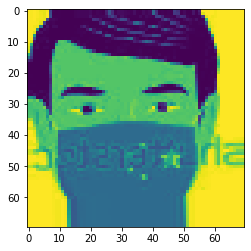

In [12]:
plt.imshow(X[1])

In [13]:
items={0:'Incorrect_mask',1:'with_mask',2:'Without_Mask' }

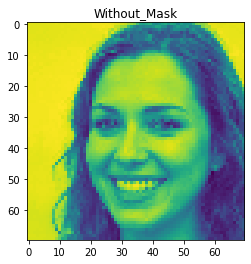

In [14]:
plt.imshow(X[11111]);
plt.title(items[Y[11111]]);

## Building the model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

Epoch 1/25
1036/1036 [==============================] - 2s 1ms/step - loss: 2.0240 - accuracy: 0.6057 - val_loss: 3.5049 - val_accuracy: 0.1489
Epoch 2/25
1036/1036 [==============================] - 2s 1ms/step - loss: 0.9669 - accuracy: 0.6410 - val_loss: 0.8015 - val_accuracy: 0.7341
Epoch 3/25
1036/1036 [==============================] - 1s 1ms/step - loss: 0.7279 - accuracy: 0.7229 - val_loss: 0.7456 - val_accuracy: 0.7028
Epoch 4/25
1036/1036 [==============================] - 1s 1ms/step - loss: 0.6631 - accuracy: 0.7310 - val_loss: 0.5981 - val_accuracy: 0.7450
Epoch 5/25
1036/1036 [==============================] - 1s 1ms/step - loss: 0.6163 - accuracy: 0.7403 - val_loss: 0.5386 - val_accuracy: 0.7703
Epoch 6/25
1036/1036 [==============================] - 1s 1ms/step - loss: 0.5915 - accuracy: 0.7497 - val_loss: 1.5840 - val_accuracy: 0.6178
Epoch 7/25
1036/1036 [==============================] - 1s 1ms/step - loss: 0.8028 - accuracy: 0.6754 - val_loss: 0.7385 - val_accuracy:

<AxesSubplot:>

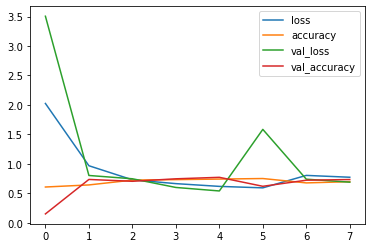

In [16]:
tf.random.set_seed(100)
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(70,70))) # 

model.add(tf.keras.layers.Dense(25,activation='relu'))

model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax')) # softmax ==>

# compile

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

callback_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
# Training the model

history_1= model.fit(X,Y, epochs=25,validation_split=0.2,callbacks=[callback_stop])

pd.DataFrame(history_1.history).plot()



Epoch 1/12
694/694 [==============================] - 1s 2ms/step - loss: 2.2136 - accuracy: 0.5412 - val_loss: 1.4667 - val_accuracy: 0.6152
Epoch 2/12
694/694 [==============================] - 1s 2ms/step - loss: 1.3154 - accuracy: 0.5782 - val_loss: 0.9954 - val_accuracy: 0.6621
Epoch 3/12
694/694 [==============================] - 1s 1ms/step - loss: 1.0462 - accuracy: 0.6097 - val_loss: 0.9150 - val_accuracy: 0.6684
Epoch 4/12
694/694 [==============================] - 1s 1ms/step - loss: 0.9356 - accuracy: 0.6426 - val_loss: 0.8208 - val_accuracy: 0.7185
Epoch 5/12
694/694 [==============================] - 1s 2ms/step - loss: 0.8098 - accuracy: 0.6867 - val_loss: 0.7315 - val_accuracy: 0.7063
Epoch 6/12
694/694 [==============================] - 1s 2ms/step - loss: 0.7317 - accuracy: 0.7099 - val_loss: 0.7489 - val_accuracy: 0.7106
Epoch 7/12
694/694 [==============================] - 1s 2ms/step - loss: 0.6390 - accuracy: 0.7442 - val_loss: 0.6041 - val_accuracy: 0.7515
Epoch 

<AxesSubplot:>

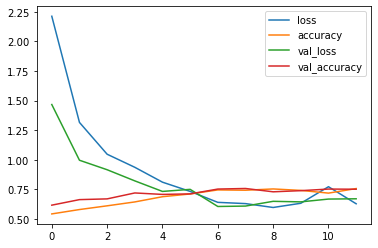

In [17]:


# patience =7

tf.random.set_seed(100)
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(70,70))) # 

model.add(tf.keras.layers.Dense(25,activation='relu'))

model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax')) # softmax ==>

# compile

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

callback_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
# Training the model

history_1= model.fit(X_train,y_train, epochs=12,validation_split=0.2,callbacks=[callback_stop])

pd.DataFrame(history_1.history).plot()


In [18]:
# Fix the model

y_pred=model.predict(X_test)

In [19]:
X_test.shape

(13664, 70, 70)

In [20]:
y_pred.shape

(13664, 3)

In [21]:
y_pred[:5]

array([[6.7526931e-01, 1.0004700e-01, 2.2468366e-01],
       [5.3548920e-01, 2.4121661e-01, 2.2329409e-01],
       [7.0832635e-04, 4.7662132e-03, 9.9452543e-01],
       [6.8149619e-02, 7.7767169e-01, 1.5417862e-01],
       [4.7680590e-02, 8.2256430e-01, 1.2975509e-01]], dtype=float32)

In [22]:
# Creating a list to get the label

y_pred_new =[]

for y in y_pred:
    y_pred_new.append(np.argmax(y))




In [23]:
y_pred_new[:5]

[0, 0, 2, 1, 1]

In [24]:
items

{0: 'Incorrect_mask', 1: 'with_mask', 2: 'Without_Mask'}

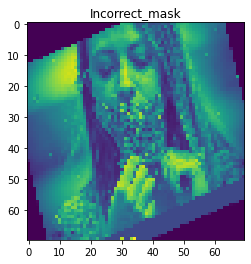

In [25]:
# Displaying the prediction

plt.imshow(X_test[1]);
plt.title(items[y_pred_new[1]]);

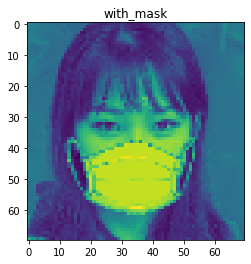

In [26]:
plt.imshow(X_test[2001]);
plt.title(items[y_pred_new[2001]]);

In [27]:
# Summary of the model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                122525    
_________________________________________________________________
dense_5 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 39        
Total params: 123,146
Trainable params: 123,146
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Layers of the model

model.layers

In [29]:
model.layers[1]

In [30]:
weigths, biases= model.layers[1].get_weights()

In [31]:
weigths

array([[-0.02352716, -0.00562706, -0.01040009, ...,  0.0255506 ,
         0.00452778, -0.00527957],
       [ 0.00397899, -0.00433637, -0.01176303, ...,  0.00484485,
        -0.01258995, -0.0268689 ],
       [-0.00161129, -0.01623979,  0.00215785, ..., -0.03029876,
        -0.02814   , -0.02658373],
       ...,
       [-0.03255513,  0.02153737,  0.01946712, ...,  0.0248189 ,
        -0.03501326, -0.00472556],
       [ 0.0106042 , -0.03437146,  0.00274717, ..., -0.02557257,
        -0.01536048, -0.00446174],
       [-0.04062713,  0.01073699,  0.02734946, ..., -0.01413136,
        -0.02976189, -0.00509865]], dtype=float32)

In [32]:
weigths.shape

(4900, 25)

In [33]:
biases

array([-0.00600492, -0.004487  ,  0.11583808, -0.10273688,  0.13961159,
       -0.04916739, -0.00600544, -0.00513411,  0.33082306, -0.00250502,
        0.5073639 , -0.00600492, -0.00600345, -0.00600505, -0.01314764,
       -0.00532478, -0.00600533, -0.00600369, -0.0053371 , -0.03529452,
       -0.01953255, -0.00600526, -0.00601372, -0.00600528, -0.00450117],
      dtype=float32)

In [34]:
biases.shape

(25,)

## Performance of the model

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
conf=confusion_matrix(y_test,y_pred_new)
report= classification_report(y_test,y_pred_new)

print(" Performance of the NN model - \n")

print(" COnfusion Matrix \n ", conf)

print(" Classificaiton Report: \n", report)

 Performance of the NN model - 

 COnfusion Matrix 
  [[ 194 1111  477]
 [  69 4943  574]
 [  46 1128 5122]]
 Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.63      0.11      0.19      1782
           1       0.69      0.88      0.77      5586
           2       0.83      0.81      0.82      6296

    accuracy                           0.75     13664
   macro avg       0.72      0.60      0.59     13664
weighted avg       0.75      0.75      0.72     13664



## Improving the model by normalising the data

In [36]:
# We use normalisation of the tensorflow


normalizer=tf.keras.layers.experimental.preprocessing.Normalization()

# Use the adapt method 

normalizer.adapt(X_train)

X_train_new= normalizer(X_train)

In [37]:
X_train_new[:5]

<tf.Tensor: shape=(5, 70, 70), dtype=float32, numpy=
array([[[-0.29349953, -0.3305185 , -0.3238049 , ..., -0.22943515,
         -0.29353347, -0.2829705 ],
        [-0.3081597 , -0.3158049 , -0.29427528, ..., -0.259059  ,
         -0.27874628, -0.26821154],
        [-0.3081597 , -0.3305185 , -0.30904007, ..., -0.22943515,
         -0.20481026, -0.22393471],
        ...,
        [-1.0411695 , -0.88963604, -0.56004155, ..., -0.6737932 ,
         -0.54491585, -0.44531888],
        [-1.0704899 , -0.9043497 , -0.54527676, ..., -0.5849216 ,
         -0.19002306, -0.43055993],
        [-1.0411695 , -0.9043497 , -0.45668802, ..., -0.52567387,
         -0.48576707, -0.43055993]],

       [[-0.9092277 , -0.87492245, -0.811043  , ..., -0.9255961 ,
         -1.0033191 , -0.96188194],
        [-0.86524713, -0.8307816 , -0.8701022 , ..., -0.718229  ,
         -0.78151107, -0.6519441 ],
        [-0.7479656 , -0.65421814, -0.4862176 , ..., -0.59973353,
         -0.6632135 , -0.74049777],
        ...,
 

Epoch 1/30
694/694 [==============================] - 1s 1ms/step - loss: 0.5798 - accuracy: 0.7338 - val_loss: 0.4868 - val_accuracy: 0.7846
Epoch 2/30
694/694 [==============================] - 1s 1ms/step - loss: 0.4345 - accuracy: 0.8063 - val_loss: 0.4448 - val_accuracy: 0.8018
Epoch 3/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.8276 - val_loss: 0.4326 - val_accuracy: 0.8153
Epoch 4/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.8403 - val_loss: 0.4252 - val_accuracy: 0.8189
Epoch 5/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.8536 - val_loss: 0.4028 - val_accuracy: 0.8299
Epoch 6/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3195 - accuracy: 0.8627 - val_loss: 0.4030 - val_accuracy: 0.8320
Epoch 7/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3047 - accuracy: 0.8697 - val_loss: 0.4050 - val_accuracy: 0.8365
Epoch 

<AxesSubplot:>

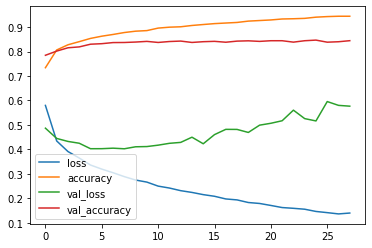

In [38]:
# Use X_train_new  for the training purpose



tf.random.set_seed(100)
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(70,70))) # 

model.add(tf.keras.layers.Dense(25,activation='relu'))

model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax')) # softmax ==>

# compile

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

callback_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)




# Training the model with new. X_train_new




history_2= model.fit(X_train_new,y_train, epochs=30,validation_split=0.2,callbacks=[callback_stop])

pd.DataFrame(history_2.history).plot()


Epoch 1/30
694/694 [==============================] - 1s 1ms/step - loss: 0.5794 - accuracy: 0.7464 - val_loss: 0.4905 - val_accuracy: 0.7850
Epoch 2/30
694/694 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.8083 - val_loss: 0.4285 - val_accuracy: 0.8153
Epoch 3/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.8302 - val_loss: 0.4186 - val_accuracy: 0.8119
Epoch 4/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8448 - val_loss: 0.4143 - val_accuracy: 0.8194
Epoch 5/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3385 - accuracy: 0.8512 - val_loss: 0.4026 - val_accuracy: 0.8311
Epoch 6/30
694/694 [==============================] - 1s 1ms/step - loss: 0.3146 - accuracy: 0.8598 - val_loss: 0.3981 - val_accuracy: 0.8259
Epoch 7/30
694/694 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.8679 - val_loss: 0.3930 - val_accuracy: 0.8398
Epoch 

<AxesSubplot:>

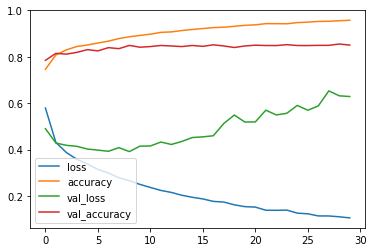

In [149]:

tf.random.set_seed(100)
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(70,70))) # 

model.add(tf.keras.layers.Dense(40,activation='relu'))

model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax')) # softmax ==>

# compile

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

callback_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30)




# Training the model with new. X_train_new




history_2= model.fit(X_train_new,y_train, epochs=30,validation_split=0.2,callbacks=[callback_stop])

pd.DataFrame(history_2.history).plot()

In [40]:
# Fix this model


In [150]:
# Normalizing the testing data

normalizer=tf.keras.layers.experimental.preprocessing.Normalization()

# Use the adapt method 

normalizer.adapt(X_test)

X_test_new= normalizer(X_test)

In [151]:
X_test[:5]

array([[[ 82,  83,  87, ..., 229, 229, 229],
        [ 85,  81,  79, ..., 228, 227, 229],
        [106, 109, 111, ..., 226, 228, 229],
        ...,
        [175, 167, 160, ...,  97,  97, 101],
        [166, 156, 167, ...,  64, 121, 143],
        [118, 119, 116, ...,  62, 107, 131]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[122, 123, 124, ..., 123, 119, 121],
        [122, 122, 124, ..., 122, 119, 121],
        [123, 123, 124, ..., 127, 129, 131],
        ...,
        [127, 123, 123, ...,  98, 104, 109],
        [110, 108, 110, ..., 121, 126, 131],
        [ 87,  92,  95, ..., 136, 136, 137]],

       [[104, 104, 104, ...,  28,  28,  28],
        [104, 104, 104, ...,  28,  27,  27],
        [104, 104, 104, ...,  27,  27,  27],
        ..

In [152]:
# predict

y_pred_1= model.predict(X_test_new)

In [153]:
y_pred_1_new =[]

for y in y_pred_1:
    y_pred_1_new.append(np.argmax(y))

In [154]:
y_pred_1_new[:5]

[0, 0, 2, 0, 0]

In [155]:
# Performance



from sklearn.metrics import confusion_matrix, classification_report
conf=confusion_matrix(y_test,y_pred_1_new)
report= classification_report(y_test,y_pred_1_new)

print(" Performance of the NN model - \n")

print(" COnfusion Matrix \n ", conf)

print(" Classificaiton Report: \n", report)

 Performance of the NN model - 

 COnfusion Matrix 
  [[1130  423  229]
 [ 272 4970  344]
 [ 261  453 5582]]
 Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.68      0.63      0.66      1782
           1       0.85      0.89      0.87      5586
           2       0.91      0.89      0.90      6296

    accuracy                           0.85     13664
   macro avg       0.81      0.80      0.81     13664
weighted avg       0.85      0.85      0.85     13664



In [47]:
import cv2

In [48]:
img=cv2.imread('/Users/shwetabh/Desktop/Screenshot 2021-07-27 at 8.17.07 PM.png',cv2.IMREAD_GRAYSCALE)

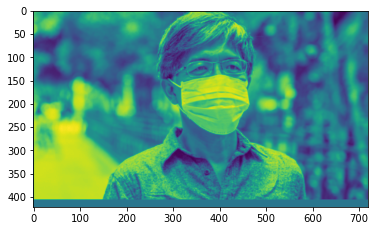

In [49]:
plt.imshow(img)

In [50]:
new_array=cv2.resize(img,(70,70))

In [51]:
new_array.shape

(70, 70)

In [52]:
P=np.array(new_array).reshape(-1,70,70)

In [53]:
prediction=model.predict(P)

In [54]:
prediction

array([[0., 1., 0.]], dtype=float32)

In [55]:
y_predd =[]

for y in prediction:
    y_predd.append(np.argmax(y))

In [56]:
y_predd 

[1]

In [57]:
y_predd

[1]

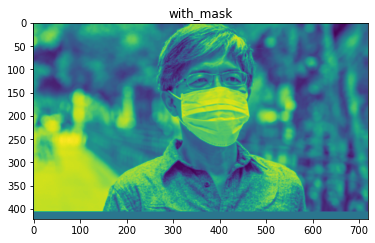

In [58]:
plt.imshow(img);
plt.title(items[y_predd[0]]);

In [134]:
img=cv2.imread('/Users/shwetabh/Desktop/e5a5e7c9-4fe1-4fa3-86d8-edf23a2528ff.jpg',cv2.IMREAD_GRAYSCALE)

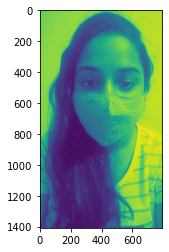

In [135]:
plt.imshow(img)

In [136]:
new_array=cv2.resize(img,(70,70))

In [137]:
new_array.shape

(70, 70)

In [138]:
P=np.array(new_array).reshape(-1,70,70)

In [139]:
prediction=model.predict(P)

In [147]:
prediction

array([[1., 0., 0.]], dtype=float32)

In [141]:
y_predd =[]

for y in prediction:
    y_predd.append(np.argmax(y))

In [142]:
y_predd 

[0]

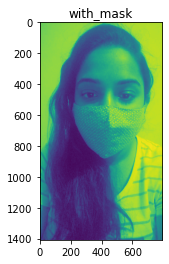

In [146]:
plt.imshow(img);
plt.title(items[1]);